# GHZ$_6$ - Fidelity witness
## Find measurement settings
### Let's define some functions

In [1]:
import numpy as np

#convert deg to rad
def theta(x):
    return x*np.pi/180

# Lambda-Half wave plate
def HWP(x):
    return np.array([[np.cos(2*theta(x)),np.sin(2*theta(x))],[np.sin(2*theta(x)),-np.cos(2*theta(x))]])

# QWP
def QWP(x):
    return np.array([[np.cos(theta(x))**2+1j*np.sin(theta(x))**2,(1-1j)*np.sin(theta(x))*np.cos(theta(x))],
            [(1-1j)*np.sin(theta(x))*np.cos(theta(x)),np.sin(theta(x))**2+1j*np.cos(theta(x))**2]])

#identity matrix
idn = np.eye(2)

#basic states
h = np.array([[1],[0]])
v = np.array([[0],[1]])
phi_p = np.array([[1],[0],[0],[1]]/np.sqrt(2));
phi_m = np.array([[1],[0],[0],[-1]]/np.sqrt(2));
psi_p = np.array([[0],[1],[1],[0]]/np.sqrt(2));
psi_m = np.array([[0],[1],[-1],[0]]/np.sqrt(2));
#conjugate transpose
h_ct = np.conj(h.T)
v_ct = np.conj(v.T)

#pauli matrices
sx = np.array([[0, 1],[ 1, 0]])
sy = np.array([[0, -1j],[1j, 0]])
sz = np.array([[1, 0],[0, -1]])

# Convert pure vector state into density matrix
def dens(state):
    return state@np.conj(state.T)

def meas(ang,sigma):
    return QWP(ang[1])@HWP(ang[0])@sigma@np.conj((QWP(ang[1])@HWP(ang[0])).T)

## Find setting 1

In [5]:
from scipy.optimize import fsolve,leastsq,minimize,basinhopping
from random import seed,random

sigma_1 = np.cos(0*np.pi/6)*sx + np.sin(0*np.pi/6)*sy

# function to minimise
def fC(x0):
   # x,y = x0
    matr = meas([x0[0],x0[1]],sigma_1)-sz
    return np.sum(np.abs(np.real(matr)))+np.sum(np.abs(np.imag(matr)))

#print(fC([11.25,-22.5]))

# create random list of initial guesses for angles
min_ang = -10
max_ang = 10
# function to scale random number in given range
def scl_rnd(value,min_ang,max_ang):
    return min_ang + (value * (max_ang - min_ang))

ini = [] # will hold all initial guesses

# seed random number generator
seed(1)

# how many minimisations should we run?
runs = 500
for i in range(runs):
    values = [scl_rnd(random(),-10,10),scl_rnd(random(),-10,10)]
    ini.append(values)
    
angles_1 = [] # will contain successfull optimisation results
for init in ini:
    x1 = minimize(fC,init,bounds=((-45,45),(-45,45)))
    if x1.success and x1.fun<.001:
        angles_1.append(x1.x)
        
print('Successful minimisations: {}'.format(np.shape(angles_1)[0]))
print('Success rate of minimisation procedure: {:2.0f}%'.format(np.shape(angles_1)[0]/runs*100))
#test = meas([-11.25,22.5],sigma_1)-sz
#np.sum(np.abs(np.real(test)))+np.sum(np.abs(np.imag(test)))

Successful minimisations: 394
Success rate of minimisation procedure: 79%


### Plot results for angles_1

HWP: 22.4999 ± 0.0008
QWP: -0.0001 ± 0.0012


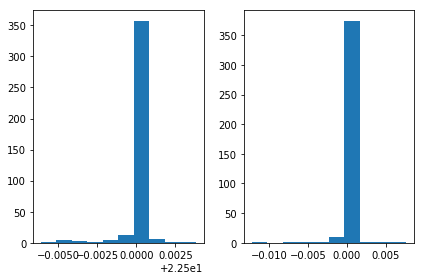

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
from statistics import mean,stdev

# separate lists
hwp_list = [x[0] for x in angles_1]
qwp_list = [x[1] for x in angles_1]

# plot
fig, ax = plt.subplots(nrows=1, ncols=2)

ax[0].hist(hwp_list)
ax[1].hist(qwp_list)

fig.tight_layout()
#fig.show()

print('HWP: {0:.4f} ± {1:.4f}'.format(mean(hwp_list),stdev(hwp_list)))
print('QWP: {0:.4f} ± {1:.4f}'.format(mean(qwp_list),stdev(qwp_list)))

## Find setting 2

In [8]:
from scipy.optimize import fsolve,leastsq,minimize,basinhopping
from random import seed,random

sigma_2 = np.cos(1*np.pi/6)*sx + np.sin(1*np.pi/6)*sy

# function to minimise
def fC(x0):
   # x,y = x0
    matr = meas([x0[0],x0[1]],sigma_2)-sz
    return np.sum(np.abs(np.real(matr)))+np.sum(np.abs(np.imag(matr)))

#print(fC([11.25,-22.5]))

# create random list of initial guesses for angles
min_ang = -10
max_ang = 10
# function to scale random number in given range
def scl_rnd(value,min_ang,max_ang):
    return min_ang + (value * (max_ang - min_ang))

ini = [] # will hold all initial guesses

# seed random number generator
seed(1)

# how many minimisations should we run?
runs = 300
for i in range(runs):
    values = [scl_rnd(random(),-10,10),scl_rnd(random(),-10,10)]
    ini.append(values)
    
angles_2 = [] # will contain successfull optimisation results
for init in ini:
    x1 = minimize(fC,init,bounds=((-45,45),(-45,45)))
    if x1.success and x1.fun<.001:
        angles_2.append(x1.x)
        
print('Successful minimisations: {}'.format(np.shape(angles_2)[0]))
print('Success rate of minimisation procedure: {:2.0f}%'.format(np.shape(angles_2)[0]/runs*100))
#test = meas([-11.25,22.5],sigma_1)-sz
#np.sum(np.abs(np.real(test)))+np.sum(np.abs(np.imag(test)))

Successful minimisations: 188
Success rate of minimisation procedure: 63%


### Plot results for angles_2

HWP: 15.0001 ± 0.0010
QWP: -14.9999 ± 0.0011


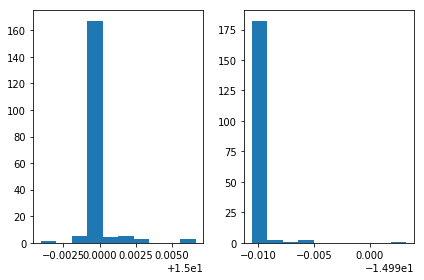

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
from statistics import mean,stdev

# separate lists
hwp_list = [x[0] for x in angles_2]
qwp_list = [x[1] for x in angles_2]

# plot
fig, ax = plt.subplots(nrows=1, ncols=2)

ax[0].hist(hwp_list)
ax[1].hist(qwp_list)

fig.tight_layout()
#fig.show()

print('HWP: {0:.4f} ± {1:.4f}'.format(mean(hwp_list),stdev(hwp_list)))
print('QWP: {0:.4f} ± {1:.4f}'.format(mean(qwp_list),stdev(qwp_list)))

## Find setting 3

In [11]:
from scipy.optimize import fsolve,leastsq,minimize,basinhopping
from random import seed,random

sigma_3 = np.cos(2*np.pi/6)*sx + np.sin(2*np.pi/6)*sy

# function to minimise
def fC(x0):
   # x,y = x0
    matr = meas([x0[0],x0[1]],sigma_3)-sz
    return np.sum(np.abs(np.real(matr)))+np.sum(np.abs(np.imag(matr)))

#print(fC([11.25,-22.5]))

# create random list of initial guesses for angles
min_ang = -10
max_ang = 10
# function to scale random number in given range
def scl_rnd(value,min_ang,max_ang):
    return min_ang + (value * (max_ang - min_ang))

ini = [] # will hold all initial guesses

# seed random number generator
seed(1)

# how many minimisations should we run?
runs = 100
for i in range(runs):
    values = [scl_rnd(random(),-10,10),scl_rnd(random(),-10,10)]
    ini.append(values)
    
angles_3 = [] # will contain successfull optimisation results
for init in ini:
    x1 = minimize(fC,init,bounds=((-45,45),(-45,45)))
    if x1.success and x1.fun<.001:
        angles_3.append(x1.x)
        
print('Successful minimisations: {}'.format(np.shape(angles_3)[0]))
print('Success rate of minimisation procedure: {:2.0f}%'.format(np.shape(angles_3)[0]/runs*100))
#test = meas([-11.25,22.5],sigma_1)-sz
#np.sum(np.abs(np.real(test)))+np.sum(np.abs(np.imag(test)))

Successful minimisations: 54
Success rate of minimisation procedure: 54%


### Plot results for angles_3

HWP: 7.4999 ± 0.0004
QWP: -30.0001 ± 0.0004


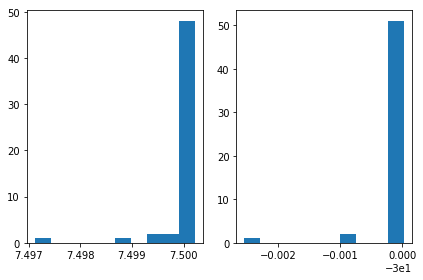

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
from statistics import mean,stdev

# separate lists
hwp_list = [x[0] for x in angles_3]
qwp_list = [x[1] for x in angles_3]

# plot
fig, ax = plt.subplots(nrows=1, ncols=2)

ax[0].hist(hwp_list)
ax[1].hist(qwp_list)

fig.tight_layout()
#fig.show()

print('HWP: {0:.4f} ± {1:.4f}'.format(mean(hwp_list),stdev(hwp_list)))
print('QWP: {0:.4f} ± {1:.4f}'.format(mean(qwp_list),stdev(qwp_list)))
#meas([-4,-45],sigma_3)-sz

## Find setting 4

In [14]:
from scipy.optimize import fsolve,leastsq,minimize,basinhopping
from random import seed,random

sigma_4 = np.cos(3*np.pi/6)*sx + np.sin(3*np.pi/6)*sy

# function to minimise
def fC(x0):
   # x,y = x0
    matr = meas([x0[0],x0[1]],sigma_4)-sz
    return np.sum(np.abs(np.real(matr)))+np.sum(np.abs(np.imag(matr)))

#print(fC([11.25,-22.5]))

# create random list of initial guesses for angles
min_ang = -10
max_ang = 10
# function to scale random number in given range
def scl_rnd(value,min_ang,max_ang):
    return min_ang + (value * (max_ang - min_ang))

ini = [] # will hold all initial guesses

# seed random number generator
seed(1)

# how many minimisations should we run?
runs = 300
for i in range(runs):
    values = [scl_rnd(random(),-10,10),scl_rnd(random(),-10,10)]
    ini.append(values)
    
angles_4 = [] # will contain successfull optimisation results
for init in ini:
    x1 = minimize(fC,init,bounds=((-45,45),(-45,45)))
    if x1.success and x1.fun<.001:
        angles_4.append(x1.x)
        
print('Successful minimisations: {}'.format(np.shape(angles_4)[0]))
print('Success rate of minimisation procedure: {:2.0f}%'.format(np.shape(angles_4)[0]/runs*100))
#test = meas([-11.25,22.5],sigma_1)-sz
#np.sum(np.abs(np.real(test)))+np.sum(np.abs(np.imag(test)))

Successful minimisations: 300
Success rate of minimisation procedure: 100%


### Plot results for angles_4

HWP: 0.2023 ± 5.8935
QWP: -45.0000 ± 0.0000


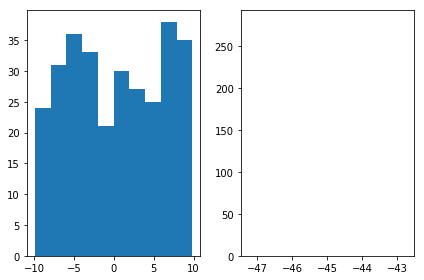

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
from statistics import mean,stdev

# separate lists
hwp_list = [x[0] for x in angles_4]
qwp_list = [x[1] for x in angles_4]

# plot
fig, ax = plt.subplots(nrows=1, ncols=2)

ax[0].hist(hwp_list)
ax[1].hist(qwp_list)

fig.tight_layout()
#fig.show()

print('HWP: {0:.4f} ± {1:.4f}'.format(mean(hwp_list),stdev(hwp_list)))
print('QWP: {0:.4f} ± {1:.4f}'.format(mean(qwp_list),stdev(qwp_list)))

## Find setting 5

In [16]:
from scipy.optimize import fsolve,leastsq,minimize,basinhopping
from random import seed,random

sigma_5 = np.cos(4*np.pi/6)*sx + np.sin(4*np.pi/6)*sy

# function to minimise
def fC(x0):
   # x,y = x0
    matr = meas([x0[0],x0[1]],sigma_5)-sz
    return np.sum(np.abs(np.real(matr)))+np.sum(np.abs(np.imag(matr)))

#print(fC([11.25,-22.5]))

# create random list of initial guesses for angles
min_ang = -10
max_ang = 10
# function to scale random number in given range
def scl_rnd(value,min_ang,max_ang):
    return min_ang + (value * (max_ang - min_ang))

ini = [] # will hold all initial guesses

# seed random number generator
seed(1)

# how many minimisations should we run?
runs = 300
for i in range(runs):
    values = [scl_rnd(random(),-10,10),scl_rnd(random(),-10,10)]
    ini.append(values)
    
angles_5 = [] # will contain successfull optimisation results
for init in ini:
    x1 = minimize(fC,init,bounds=((-45,45),(-45,45)))
    if x1.success and x1.fun<.001:
        angles_5.append(x1.x)
        
print('Successful minimisations: {}'.format(np.shape(angles_5)[0]))
print('Success rate of minimisation procedure: {:2.0f}%'.format(np.shape(angles_5)[0]/runs*100))
#test = meas([-11.25,22.5],sigma_1)-sz
#np.sum(np.abs(np.real(test)))+np.sum(np.abs(np.imag(test)))

Successful minimisations: 194
Success rate of minimisation procedure: 65%


### Plot results for angles_5

HWP: -37.4996 ± 0.0024
QWP: -29.9999 ± 0.0009


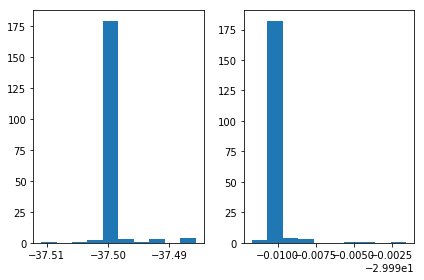

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
from statistics import mean,stdev

# separate lists
hwp_list = [x[0] for x in angles_5]
qwp_list = [x[1] for x in angles_5]

# plot
fig, ax = plt.subplots(nrows=1, ncols=2)

ax[0].hist(hwp_list)
ax[1].hist(qwp_list)

fig.tight_layout()
#fig.show()

print('HWP: {0:.4f} ± {1:.4f}'.format(mean(hwp_list),stdev(hwp_list)))
print('QWP: {0:.4f} ± {1:.4f}'.format(mean(qwp_list),stdev(qwp_list)))

## Find setting 6

In [18]:
from scipy.optimize import fsolve,leastsq,minimize,basinhopping
from random import seed,random

sigma_6 = np.cos(5*np.pi/6)*sx + np.sin(5*np.pi/6)*sy

# function to minimise
def fC(x0):
   # x,y = x0
    matr = meas([x0[0],x0[1]],sigma_6)-sz
    return np.sum(np.abs(np.real(matr)))+np.sum(np.abs(np.imag(matr)))

#print(fC([11.25,-22.5]))

# create random list of initial guesses for angles
min_ang = -10
max_ang = 10
# function to scale random number in given range
def scl_rnd(value,min_ang,max_ang):
    return min_ang + (value * (max_ang - min_ang))

ini = [] # will hold all initial guesses

# seed random number generator
seed(1)

# how many minimisations should we run?
runs = 300
for i in range(runs):
    values = [scl_rnd(random(),-10,10),scl_rnd(random(),-10,10)]
    ini.append(values)
    
angles_6 = [] # will contain successfull optimisation results
for init in ini:
    x1 = minimize(fC,init,bounds=((-45,45),(-45,45)))
    if x1.success and x1.fun<.001:
        angles_6.append(x1.x)
        
print('Successful minimisations: {}'.format(np.shape(angles_6)[0]))
print('Success rate of minimisation procedure: {:2.0f}%'.format(np.shape(angles_6)[0]/runs*100))
#test = meas([-11.25,22.5],sigma_1)-sz
#np.sum(np.abs(np.real(test)))+np.sum(np.abs(np.imag(test)))

Successful minimisations: 225
Success rate of minimisation procedure: 75%


### Plot results for angles_6

HWP: -29.9998 ± 0.0010
QWP: -14.9998 ± 0.0013


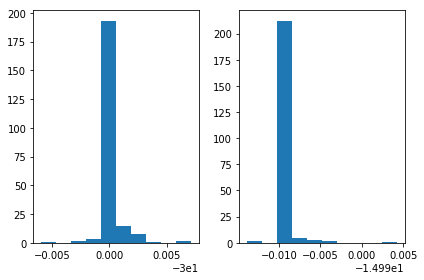

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
from statistics import mean,stdev

# separate lists
hwp_list = [x[0] for x in angles_6]
qwp_list = [x[1] for x in angles_6]

# plot
fig, ax = plt.subplots(nrows=1, ncols=2)

ax[0].hist(hwp_list)
ax[1].hist(qwp_list)

fig.tight_layout()
#fig.show()

print('HWP: {0:.4f} ± {1:.4f}'.format(mean(hwp_list),stdev(hwp_list)))
print('QWP: {0:.4f} ± {1:.4f}'.format(mean(qwp_list),stdev(qwp_list)))